In [1]:
#!pip install pandas-datareader
from pandas_datareader import data as pdr
#import pandas_datareader.data as web
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1.	Collecting Data
•	Choose five distinct equities or assets (oil, gold, bonds, currency pairs, bitcoins, etc…). Verify there is data available to import from Quandl, Alpha Vantage or Yahoo Finance.
•	Import daily prices (adj closing or spot) for all five assets. Use 1/1/2019 as the start date and 12/31/2019 as the end date. Display the first 5 rows and the total count for each asset.
•	Import daily prices for the S&P 500. Use 1/1/2019 as the start date and 12/31/2019 as the end date. Display the first 5 rows and the total count of the S&P.

In [2]:
# Setting-up start and end date for a data
start = dt.datetime (2019,1,1)
end = dt.datetime (2019,12,31)
# Creating an asset list
assetList = ['AMZN','BTC-USD','HLT','BA','JNJ','^GSPC']
# Importing data using datareader directly from yahoo
df = pdr.get_data_yahoo(assetList, start, end)
df.head()

Attributes    Adj Close                                                  \
Symbols            AMZN      BTC-USD        HLT          BA         JNJ   
Date                                                                      
2019-01-01          NaN  3843.520020        NaN         NaN         NaN   
2019-01-02  1539.130005  3943.409424  70.371269  314.645142  117.985725   
2019-01-03  1500.280029  3836.741211  66.760445  302.100555  116.110886   
2019-01-04  1575.390015  3857.717529  69.379280  317.822571  118.059616   
2019-01-05          NaN  3845.194580        NaN         NaN         NaN   

Attributes                     Close                                      ...  \
Symbols           ^GSPC         AMZN      BTC-USD        HLT          BA  ...   
Date                                                                      ...   
2019-01-01          NaN          NaN  3843.520020        NaN         NaN  ...   
2019-01-02  2510.030029  1539.130005  3943.409424  70.940002  323.809998  ...   
2019-01-03  2447.889893  1500.280029  3836.741211  67.300003  310.899994  ...   
2019-01-04  2531.939941  1575.390015  3857.717529  69.940002  327.079987  ...   
2019-01-05          NaN          NaN  3845.194580        NaN         NaN  ...   

Attributes       Open                                          Volume  \
Symbols           HLT          BA         JNJ        ^GSPC       AMZN   
Date                                                                    
2019-01-01        NaN         NaN         NaN          NaN        NaN   
2019-01-02  70.690002  316.190002  128.130005  2476.959961  7983100.0   
2019-01-03  70.449997  319.489990  128.139999  2491.919922  6975600.0   
2019-01-04  68.410004  316.690002  127.120003  2474.330078  9182600.0   
2019-01-05        NaN         NaN         NaN          NaN        NaN   

Attributes                                                               
Symbols          BTC-USD        HLT         BA        JNJ         ^GSPC  
Date                                                                     
2019-01-01  4.324201e+09        NaN        NaN        NaN           NaN  
2019-01-02  5.244857e+09  3629500.0  3292200.0  7631700.0  3.733160e+09  
2019-01-03  4.530215e+09  5629200.0  5705600.0  8654500.0  3.822860e+09  
2019-01-04  4.847965e+09  4110700.0  4448800.0  8831700.0  4.213410e+09  
2019-01-05  5.137610e+09        NaN        NaN        NaN           NaN  

[5 rows x 36 columns]

In [3]:
# Using an. .xs method to select data at a particular level of a MultiIndex.
# In our case multiindex is Adj Close (level = 0), AMZN, BTC-USD, HLT, BA, JNJ, ^GSPC (level = 1)
# .xs selects only that section we are working with

df = df.xs('Adj Close', axis=1, drop_level=True)

df.head()

Symbols            AMZN      BTC-USD        HLT          BA         JNJ  \
Date                                                                      
2019-01-01          NaN  3843.520020        NaN         NaN         NaN   
2019-01-02  1539.130005  3943.409424  70.371269  314.645142  117.985725   
2019-01-03  1500.280029  3836.741211  66.760445  302.100555  116.110886   
2019-01-04  1575.390015  3857.717529  69.379280  317.822571  118.059616   
2019-01-05          NaN  3845.194580        NaN         NaN         NaN   

Symbols           ^GSPC  
Date                     
2019-01-01          NaN  
2019-01-02  2510.030029  
2019-01-03  2447.889893  
2019-01-04  2531.939941  
2019-01-05          NaN

In [4]:
# Substitute a NaN values to a mean value of each column
df=df.fillna(df.mean())
df.head()

Symbols            AMZN      BTC-USD        HLT          BA         JNJ  \
Date                                                                      
2019-01-01  1789.189206  3843.520020  90.817403  358.774866  126.276279   
2019-01-02  1539.130005  3943.409424  70.371269  314.645142  117.985725   
2019-01-03  1500.280029  3836.741211  66.760445  302.100555  116.110886   
2019-01-04  1575.390015  3857.717529  69.379280  317.822571  118.059616   
2019-01-05  1789.189206  3845.194580  90.817403  358.774866  126.276279   

Symbols           ^GSPC  
Date                     
2019-01-01  2913.356380  
2019-01-02  2510.030029  
2019-01-03  2447.889893  
2019-01-04  2531.939941  
2019-01-05  2913.356380

In [5]:
# Creating a names of the assets dictionary and renaming column names of an original dataframe
column_dict = {"AMZN":"Amazon","BTC-USD":"Bitcoin","HLT":"Hilton","BA":"Boeing","JNJ":"Johns&Johns","^GSPC":"S&P 500"}
adj_close = df.rename(columns=column_dict)
print(adj_close.head())

# To print total counts for each asset
print('--------------')
# Creating a list of columns total count rows
one_list = adj_close.count().tolist()
# Asset names list
asset_names = list(column_dict.values())
# Creating a single-row dataframe with names of assets and total count of rows
trad_days = pd.DataFrame([one_list],index=['Trading Days'], columns = asset_names, dtype = int)
print(trad_days)

Symbols          Amazon      Bitcoin     Hilton      Boeing  Johns&Johns  \
Date                                                                       
2019-01-01  1789.189206  3843.520020  90.817403  358.774866   126.276279   
2019-01-02  1539.130005  3943.409424  70.371269  314.645142   117.985725   
2019-01-03  1500.280029  3836.741211  66.760445  302.100555   116.110886   
2019-01-04  1575.390015  3857.717529  69.379280  317.822571   118.059616   
2019-01-05  1789.189206  3845.194580  90.817403  358.774866   126.276279   

Symbols         S&P 500  
Date                     
2019-01-01  2913.356380  
2019-01-02  2510.030029  
2019-01-03  2447.889893  
2019-01-04  2531.939941  
2019-01-05  2913.356380  
--------------
              Amazon  Bitcoin  Hilton  Boeing  Johns&Johns  S&P 500
Trading Days     366      366     366     366          366      366


# 2.1 Calculate daily % change (adj closing or spot) for each of the asset and the S&P. Display the first 5 rows and the total count for each data set.

In [6]:
# Using act_close() methog to show daily % change between trading dates 
adj_close_perc_change = adj_close.pct_change().rename(columns = {"Amazon":"Amazon %","Bitcoin":"Bitcoin %","Hilton":"Hilton %","Boeing":"Boeing %","Johns&Johns":"Johns&Johns %","S&P 500 %":"S&P 500"})
# Rounding data to 3 decimals
adj_close_perc_change = adj_close_perc_change.round(decimals=3)
print(adj_close_perc_change.head())

# To print total counts for each asset
print('--------------')
perc_total_rows = adj_close_perc_change.count().tolist()
trad_days = pd.DataFrame([perc_total_rows],index=['Trading Days'], columns = asset_names, dtype = int)
print(trad_days)


Symbols     Amazon %  Bitcoin %  Hilton %  Boeing %  Johns&Johns %  S&P 500
Date                                                                       
2019-01-01       NaN        NaN       NaN       NaN            NaN      NaN
2019-01-02    -0.140      0.026    -0.225    -0.123         -0.066   -0.138
2019-01-03    -0.025     -0.027    -0.051    -0.040         -0.016   -0.025
2019-01-04     0.050      0.005     0.039     0.052          0.017    0.034
2019-01-05     0.136     -0.003     0.309     0.129          0.070    0.151
--------------
              Amazon  Bitcoin  Hilton  Boeing  Johns&Johns  S&P 500
Trading Days     365      365     365     365          365      365


# 2.2 Plot the daily % change (adj closing or spot) data using a bar graph for each asset.

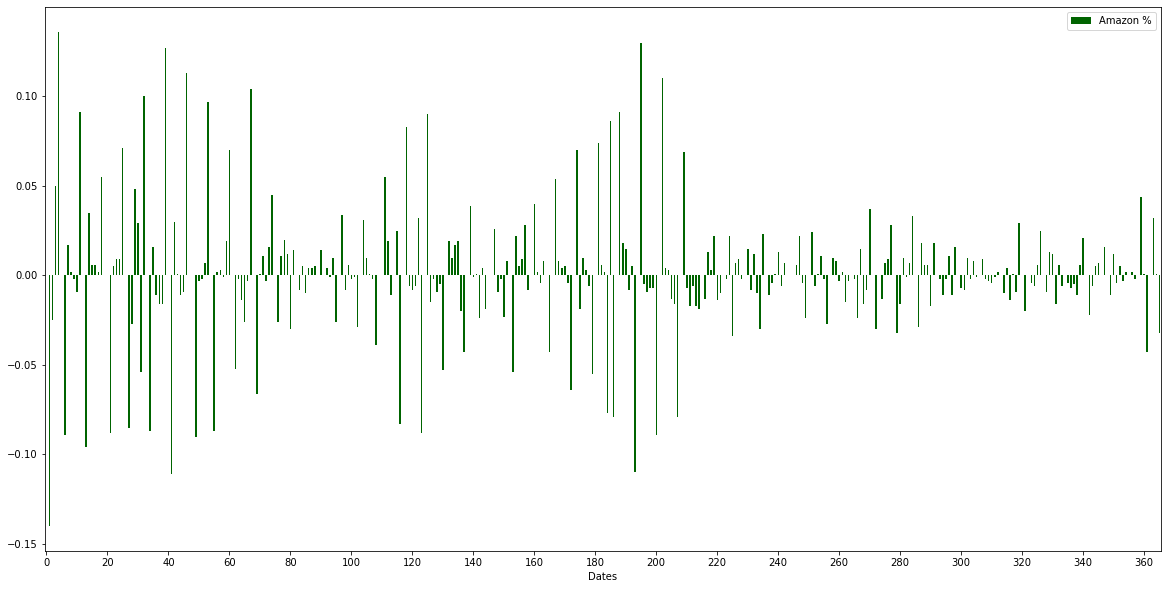

In [7]:
# Amazon % change plotting
#-------------------------
# Creating a list of Amazon % changes from "% Change Dataframe"
amazon_perc_list = list(adj_close_perc_change.iloc[:, 0])
# Creating a list of dates from "% Change Dataframe"
dates_list = adj_close_perc_change.index.tolist()
# Making a single dataframe from the above lists
df_amazon = pd.DataFrame({'Dates':dates_list, 'Amazon %':amazon_perc_list})
# Plotting Amazon % change data into a barchart
ax_amazon = df_amazon.plot(kind='bar',x='Dates', y='Amazon %', rot=0, figsize=(20,10), color='darkgreen')

#Make X-axis values look nicer
ticks_to_use = np.arange(0,len(df_amazon),20) #where dframe is the variable you use to store your data; the ticks will be in groups of 20
labels = [df_amazon.index[i] for i in ticks_to_use] #this will match the values in the index of your df (date) to the values in ticks_to_use
ax_amazon.set_xticks(ticks_to_use)
ax_amazon.set_xticklabels(labels)
plt.show()


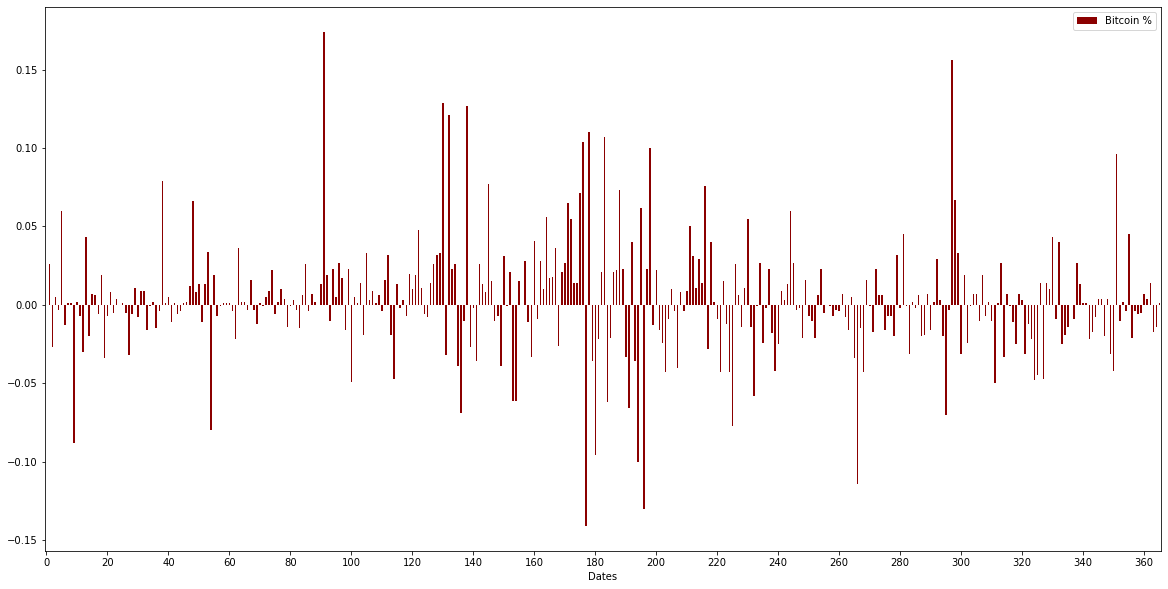

In [8]:
# Bitcoin % change plotting
#-------------------------
# Creating a list of Bitcoin % changes from "% Change Dataframe"
bitcoin_perc_list = list(adj_close_perc_change.iloc[:, 1])
# Creating a list of dates from "% Change Dataframe"
dates_list = adj_close_perc_change.index.tolist()
# Making a single dataframe from the above lists
df_bitcoin = pd.DataFrame({'Dates':dates_list, 'Bitcoin %':bitcoin_perc_list})
# Plotting Bitcoin % change data into a barchart
ax_bitcoin = df_bitcoin.plot(kind='bar', x='Dates', y='Bitcoin %', rot=0, figsize=(20,10), color='darkRed')

#Make X-axis values look nicer
tricks_to_use1 = np.arange(0, len(df_bitcoin), 20)
labels1 = [df_amazon.index[i] for i in tricks_to_use1]
ax_bitcoin.set_xticks(tricks_to_use1)
ax_bitcoin.set_xticklabels(labels1)

plt.show()

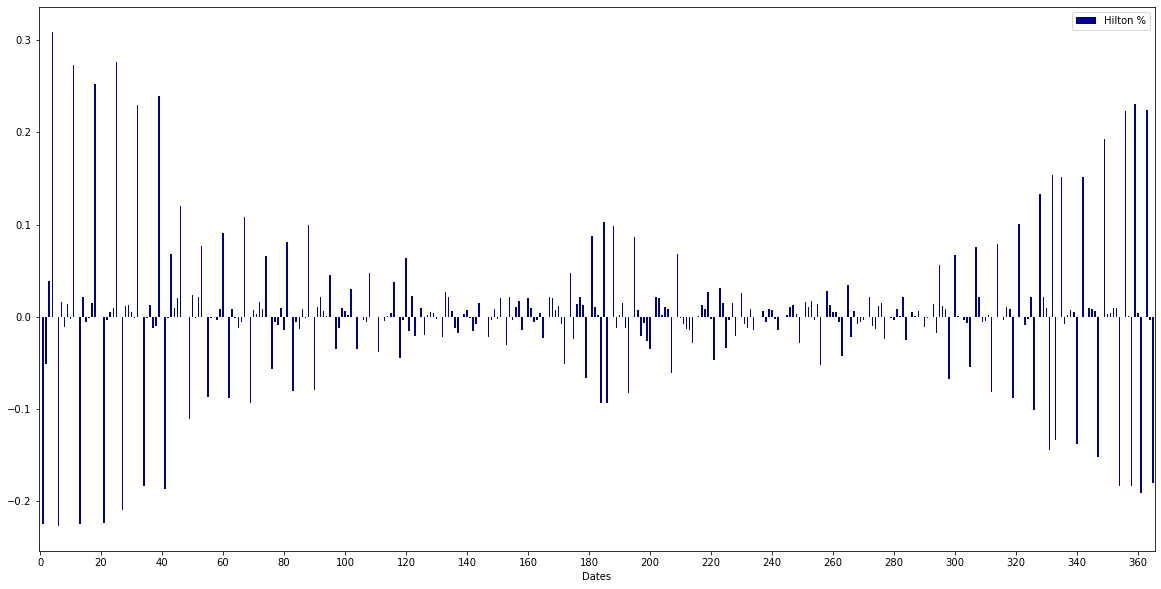

In [9]:
# Hilton % change plotting
#-------------------------
# Creating a list of Hilton % changes from "% Change Dataframe"
hilton_perc_list = list(adj_close_perc_change.iloc[:, 2])
# Creating a list of dates from "% Change Dataframe"
dates_list = adj_close_perc_change.index.tolist()
# Making a single dataframe from the above lists
df_hilton = pd.DataFrame({'Dates':dates_list, 'Hilton %':hilton_perc_list})
# Plotting Hilton % change data into a barchart
ax_hilton = df_hilton.plot(kind='bar',x='Dates', y='Hilton %', rot=0, figsize=(20,10),color='darkblue')

#Make X-axis values look nicer
tricks_to_use2 = np.arange(0, len(df_hilton), 20)
labels2 = [df_hilton.index[i] for i in tricks_to_use2]
ax_hilton.set_xticks(tricks_to_use2)
ax_hilton.set_xticklabels(labels2)

plt.show()

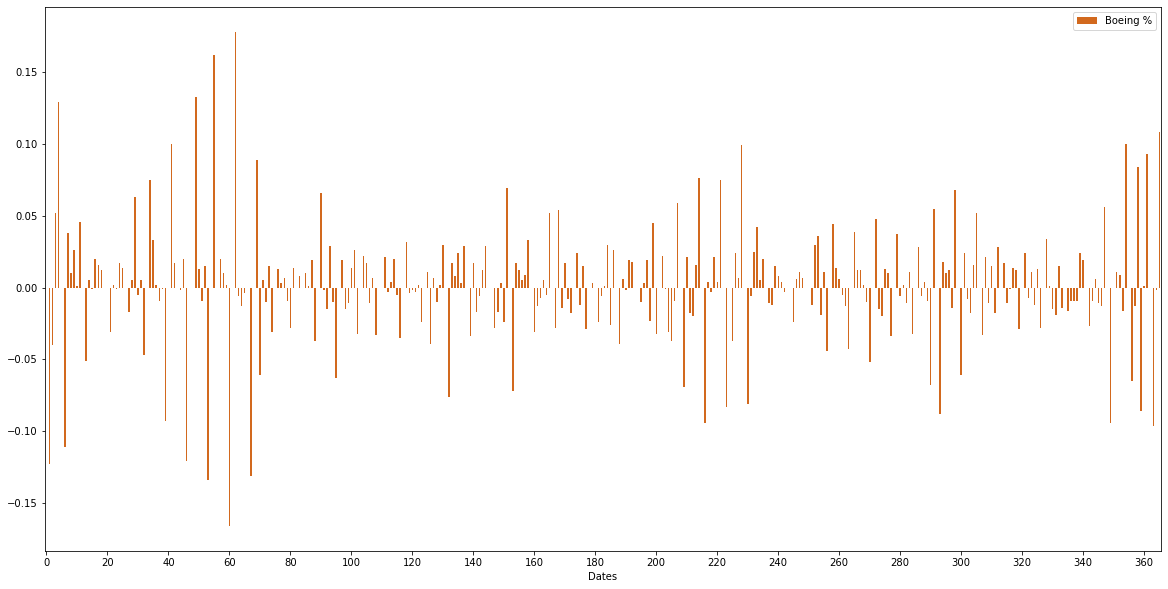

In [10]:
# Boeing % change plotting
#-------------------------
# Creating a list of Boeing % changes from "% Change Dataframe"
boeing_perc_list = list(adj_close_perc_change.iloc[:, 3])
# Creating a list of dates from "% Change Dataframe"
dates_list = adj_close_perc_change.index.tolist()
# Making a single dataframe from the above lists
df_boeing = pd.DataFrame({'Dates':dates_list, 'Boeing %':boeing_perc_list})
# Plotting Boeing % change data into a barchart
ax_boeing = df_boeing.plot(kind='bar',x='Dates', y='Boeing %', rot=0, figsize=(20,10),color='chocolate')

#Make X-axis values look nicer
tricks_to_use3 = np.arange(0, len(df_boeing), 20)
labels3 = [df_boeing.index[i] for i in tricks_to_use3]
ax_boeing.set_xticks(tricks_to_use3)
ax_boeing.set_xticklabels(labels3)

plt.show()

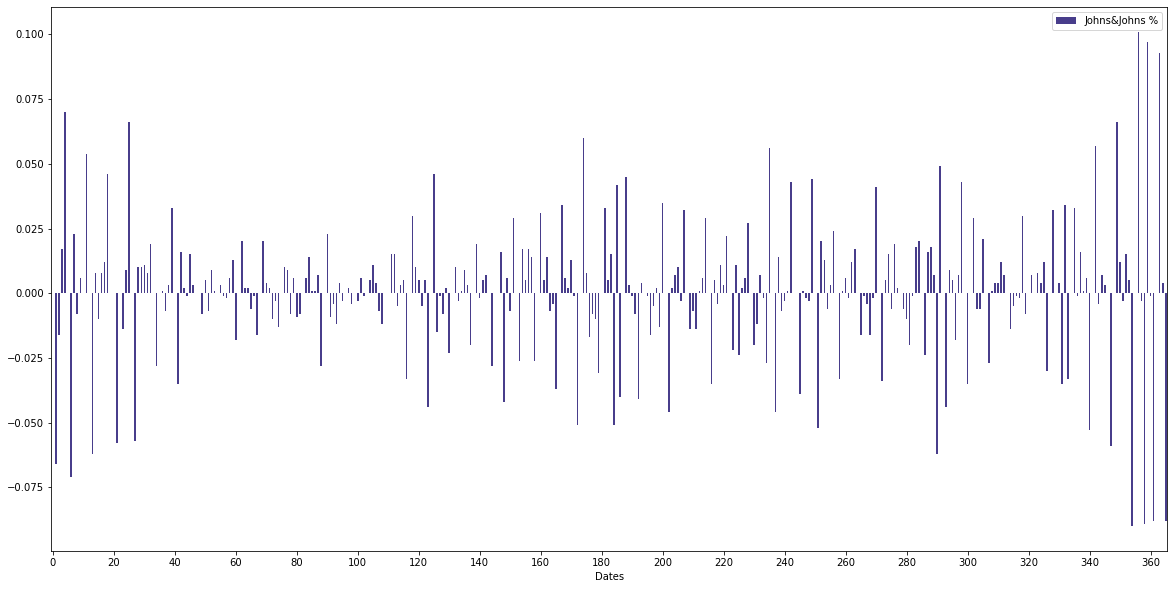

In [11]:
# Johns&Johns % change plotting
#-------------------------
# Creating a list of Johns&Johns % changes from "% Change Dataframe"
jnj_perc_list = list(adj_close_perc_change.iloc[:, 4])
# Creating a list of dates from "% Change Dataframe"
dates_list = adj_close_perc_change.index.tolist()
# Making a single dataframe from the above lists
df_jnj = pd.DataFrame({'Dates':dates_list, 'Johns&Johns %':jnj_perc_list})
# Plotting Johns&Johns % change data into a barchart
ax_jnj = df_jnj.plot(kind='bar',x='Dates', y='Johns&Johns %', rot=0, figsize=(20,10),color='darkslateblue')

#Make X-axis values look nicer
tricks_to_use4 = np.arange(0, len(df_jnj), 20)
labels4 = [df_jnj.index[i] for i in tricks_to_use4]
ax_jnj.set_xticks(tricks_to_use4)
ax_jnj.set_xticklabels(labels4)

plt.show()

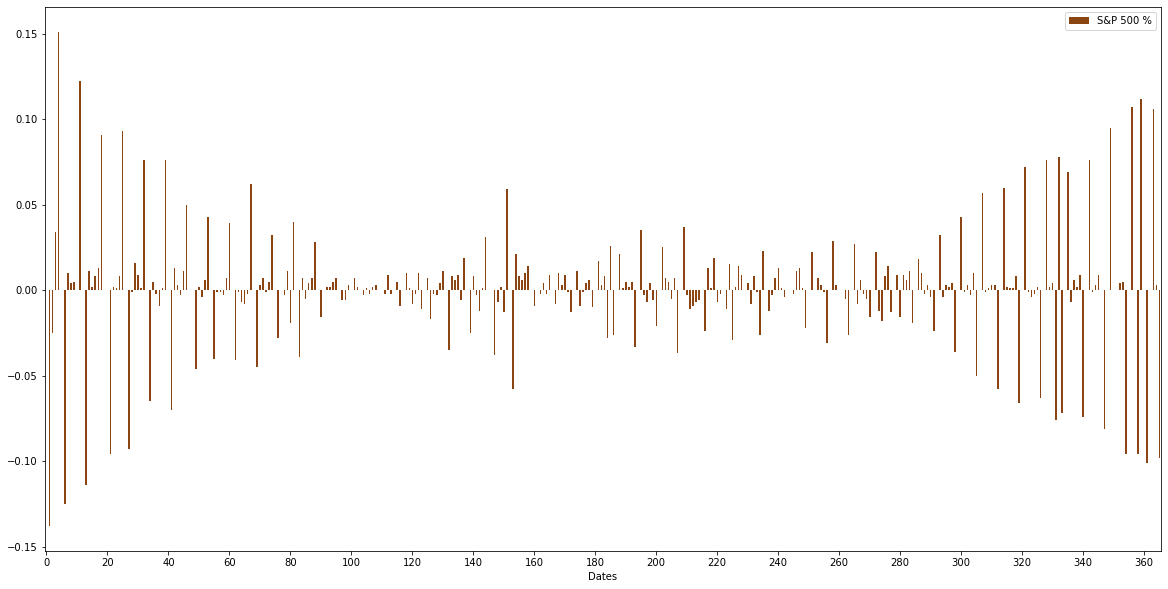

In [12]:
# S&P 500 % change plotting
#-------------------------
# Creating a list of S&P 500 % changes from "% Change Dataframe"
sp_perc_list = list(adj_close_perc_change.iloc[:, 5])
# Creating a list of dates from "% Change Dataframe"
dates_list = adj_close_perc_change.index.tolist()
# Making a single dataframe from the above lists
df_sp = pd.DataFrame({'Dates':dates_list, 'S&P 500 %':sp_perc_list})
# Plotting S&P 500 % change data into a barchart
ax_sp = df_sp.plot(kind='bar',x='Dates', y='S&P 500 %', rot=0, figsize=(20,10),color='saddlebrown')

#Make X-axis values look nicer
tricks_to_use5 = np.arange(0, len(df_sp), 20)
labels5 = [df_sp.index[i] for i in tricks_to_use5]
ax_sp.set_xticks(tricks_to_use5)
ax_sp.set_xticklabels(labels5)

plt.show()

# 2.3  Calculate and display the mean, standard deviation, variance, min, and max for each set of data.

In [13]:
adj_close.describe()

Symbols       Amazon       Bitcoin      Hilton      Boeing  Johns&Johns  \
count     366.000000    366.000000  366.000000  366.000000   366.000000   
mean     1789.189206   7394.713298   90.817403  358.774866   126.276279   
std        84.015302   2635.037732    7.934374   19.127988     3.975649   
min      1500.280029   3399.471680   66.760445  302.100555   116.110886   
25%      1762.305023   4890.608154   89.978260  348.578857   123.641045   
50%      1789.189206   7823.127441   90.817403  358.774866   126.276279   
75%      1819.242493   9545.576172   93.489424  365.728638   128.313377   
max      2020.989990  13016.231445  112.217796  430.299988   139.059723   

Symbols      S&P 500  
count     366.000000  
mean     2913.356380  
std       124.943118  
min      2447.889893  
25%      2879.397400  
50%      2913.356380  
75%      2969.352539  
max      3240.020020

# 3.	Regression Analysis

Using scikit-learn, perform five linear regressions for each of the five assets against the S&P 500. 
               Y should be % change S&P 500. X should be % change for each asset.

For each regression, plot the samples and the linear model. 
              Label the Y axis as S&P 500 and the X axis as each asset.

Calculate and display the intercept, coefficient (slope), R2, and the Mean squared error.

Which asset is highly correlated with the S&P 500 and which asset is the least correlated?


In [14]:
#Making a copy of the dataframe

df_new=adj_close_perc_change.copy()

#adj_close_perc_change

In [15]:
df_new.head()

Symbols     Amazon %  Bitcoin %  Hilton %  Boeing %  Johns&Johns %  S&P 500
Date                                                                       
2019-01-01       NaN        NaN       NaN       NaN            NaN      NaN
2019-01-02    -0.140      0.026    -0.225    -0.123         -0.066   -0.138
2019-01-03    -0.025     -0.027    -0.051    -0.040         -0.016   -0.025
2019-01-04     0.050      0.005     0.039     0.052          0.017    0.034
2019-01-05     0.136     -0.003     0.309     0.129          0.070    0.151

In [16]:
#analyzing the shape (# of rows, # of columns)
df_new.shape

(366, 6)

In [17]:
#Checking for the null values
df_new.isna().sum()

Symbols
Amazon %         1
Bitcoin %        1
Hilton %         1
Boeing %         1
Johns&Johns %    1
S&P 500          1
dtype: int64

In [18]:
#Removing the null values from the dataframe
df_new.dropna(inplace=True)

In [19]:
df_new.isna().sum()

Symbols
Amazon %         0
Bitcoin %        0
Hilton %         0
Boeing %         0
Johns&Johns %    0
S&P 500          0
dtype: int64

In [20]:
#import libraries 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [21]:
print(df_new.columns)

Index(['Amazon %', 'Bitcoin %', 'Hilton %', 'Boeing %', 'Johns&Johns %',
       'S&P 500'],
      dtype='object', name='Symbols')


#### Amazon

In [22]:
amazon=df_new[['Amazon %']]
y=df_new[['S&P 500']]

In [23]:
#Split the data into train and test set with 80:20 ratio.
X_train, X_test, y_train, y_test = train_test_split(amazon, y, test_size = 0.2, random_state=555)


In [24]:
# Linear Regression
reg = LinearRegression().fit(X_train, y_train)

In [25]:
# Coefficient (Slope)
print("Coefficient (slope): ", reg.coef_)

Coefficient (slope):  [[0.5315782]]


In [26]:
# Intercept
print("Intercept: ", reg.intercept_)

Intercept:  [-0.00072132]


In [27]:
#prediction from the trained model
y_pred = reg.predict(X_test)

In [28]:
#R2 score and mean squared error
print("R2 score : %.2f" % r2_score(y_test,y_pred))
print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred))

R2 score : 0.23
Mean squared error: 0.00


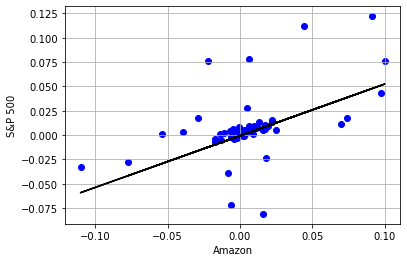

In [29]:
#plot the model results
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
plt.xlabel("Amazon")
plt.ylabel("S&P 500")
plt.grid()
  
plt.show()
# Data scatter of predicted values

#### Bitcoin

In [30]:
bitcoin=df_new[['Bitcoin %']]
y=df_new[['S&P 500']]

In [31]:
#Split the data into train and test set with 80:20 ratio.
X_train, X_test, y_train, y_test = train_test_split(bitcoin, y, test_size = 0.2, random_state=123)


In [32]:
# Linear Regression
reg = LinearRegression().fit(X_train, y_train)

In [33]:
# Coefficient (Slope)
print("Coefficient (slope): ", reg.coef_)

Coefficient (slope):  [[-0.00966597]]


In [34]:
# Intercept
print("Intercept: ", reg.intercept_)

Intercept:  [0.00036486]


In [35]:
#prediction from the trained model
y_pred = reg.predict(X_test)

In [36]:
#R2 score and mean squared error
print("R2 score : %.2f" % r2_score(y_test,y_pred))
print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred))

R2 score : -0.00
Mean squared error: 0.00


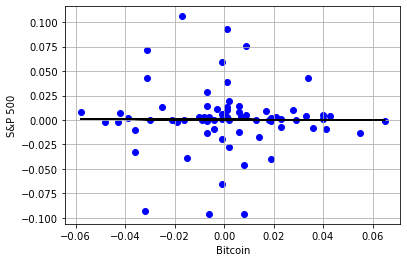

In [37]:
#plot the model results
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
plt.xlabel("Bitcoin")
plt.ylabel("S&P 500")
plt.grid()
  
plt.show()
# Data scatter of predicted values

#### Hilton

In [38]:
hilton=df_new[['Hilton %']]
y=df_new[['S&P 500']]

In [39]:
#Split the data into train and test set with 80:20 ratio.
X_train, X_test, y_train, y_test = train_test_split(hilton, y, test_size = 0.2, random_state=123)


In [40]:
# Linear Regression
reg = LinearRegression().fit(X_train, y_train)

In [41]:
# Coefficient (Slope)
print("Coefficient (slope): ", reg.coef_)

Coefficient (slope):  [[0.47190363]]


In [42]:
# Intercept
print("Intercept: ", reg.intercept_)

Intercept:  [-0.00090698]


In [43]:
#prediction from the trained model
y_pred = reg.predict(X_test)

In [44]:
#R2 score and mean squared error
print("R2 score : %.2f" % r2_score(y_test,y_pred))
print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred))

R2 score : 0.86
Mean squared error: 0.00


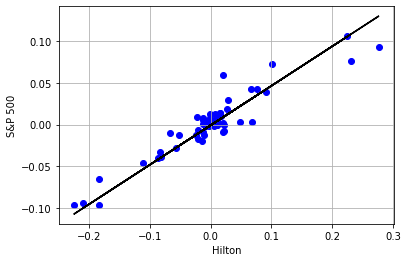

In [45]:
#plot the model results
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
plt.xlabel("Hilton")
plt.ylabel("S&P 500")
plt.grid()
  
plt.show()
# Data scatter of predicted values

#### Boeing


In [46]:
boeing=df_new[['Boeing %']]
y=df_new[['S&P 500']]

In [47]:
#Split the data into train and test set with 80:20 ratio.
X_train, X_test, y_train, y_test = train_test_split(boeing, y, test_size = 0.2, random_state=123)


In [48]:
# Linear Regression
reg = LinearRegression().fit(X_train, y_train)

In [49]:
# Coefficient (Slope)
print("Coefficient (slope): ", reg.coef_)

Coefficient (slope):  [[-0.0557995]]


In [50]:
# Intercept
print("Intercept: ", reg.intercept_)

Intercept:  [0.00036465]


In [51]:
#prediction from the trained model
y_pred = reg.predict(X_test)

In [52]:
#R2 score and mean squared error
print("R2 score : %.2f" % r2_score(y_test,y_pred))
print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred))

R2 score : 0.04
Mean squared error: 0.00


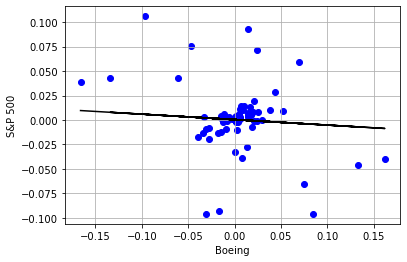

In [53]:
#plot the model results
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
plt.xlabel("Boeing")
plt.ylabel("S&P 500")
plt.grid()
  
plt.show()
# Data scatter of predicted values

#### Johns&Johns


In [54]:
johns=df_new[['Johns&Johns %']]
y=df_new[['S&P 500']]

In [55]:
#Split the data into train and test set with 80:20 ratio.
X_train, X_test, y_train, y_test = train_test_split(johns, y, test_size = 0.2, random_state=123)


In [56]:
# Linear Regression
reg = LinearRegression().fit(X_train, y_train)

In [57]:
# Coefficient (Slope)
print("Coefficient (slope): ", reg.coef_)

Coefficient (slope):  [[0.74466528]]


In [58]:
# Intercept
print("Intercept: ", reg.intercept_)

Intercept:  [-8.17457939e-05]


In [59]:
#prediction from the trained model
y_pred = reg.predict(X_test)

In [60]:
#R2 score and mean squared error
print("R2 score : %.2f" % r2_score(y_test,y_pred))
print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred))

R2 score : 0.40
Mean squared error: 0.00


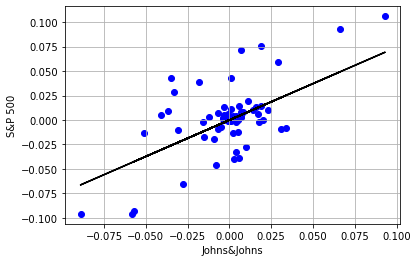

In [61]:
#plot the model results
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
plt.xlabel("Johns&Johns")
plt.ylabel("S&P 500")
plt.grid()
  
plt.show()
# Data scatter of predicted values

### Which asset is highly correlated with the S&P 500 and which asset is the least correlated?


Highly Correlated asset with S&P 500 % is: **Amazon %** 

Least Correlated asset with S&P 500 % is: **Bitcoin %**